In [44]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["font.sans-serif"] = ["SimHei"]  # 设置字体
plt.rcParams["axes.unicode_minus"] = False  # 该语句解决图像中的“-”负号的乱码问题

In [45]:
# 定义模型参数
s = 0.1  # 捕食者的自然死亡率
b = 0.2  # 捕食率
alpha = 0.3  # 竞争者的自然增长率
gamma = 0.4  # 竞争系数
delta = 0.5  # 寄生者的自然死亡率
rho = 0.6  # 寄生率

# 定义物种数量
N_predator = 100
N_competitor = 100
N_parasite = 100

# 定义时间步长
dt = 0.1

 $ \frac {dNpredator}{dt} $ =s $ \cdot $ $ N_ {predator} $ -b $ \cdot $ $ N_ {predator} $ $ \cdot $ $ N_ {prey} $ 
 $ \frac {dN_ {competitor}}{dt} $ = $ \alpha $ $ \cdot $ $ N_ {competitor} $ - $ \gamma $ $ \cdot $ $ N_ {competitor} $ $ \cdot $ $ N_ {alligator} $ 
 $ \frac {dN_ {parasite}}{dt} $ = $ \delta $ $ \cdot $ $ N_ {parasite} $ - $ \rho $ $ \cdot $ $ N_ {parasite} $ $ \cdot $ $ N_ {host} $ 

In [46]:
# 定义初始物种数量
prey = np.random.rand(N_predator)
alligator = np.random.rand(N_competitor)
host = np.random.rand(N_parasite)

# 定义模型方程
def f(prey ,predator,t):#定义捕食者的增长率
    predator_dot = s * predator - b * predator * prey
    return predator_dot

def g(alligator, competitor,t):#定义竞争者的增长率
    competitor_dot = alpha * competitor - gamma * competitor * alligator
    return competitor_dot

def h(host, parasite,t):#定义寄生者的增长率
    parasite_dot = delta * parasite - rho * parasite * host
    return parasite_dot


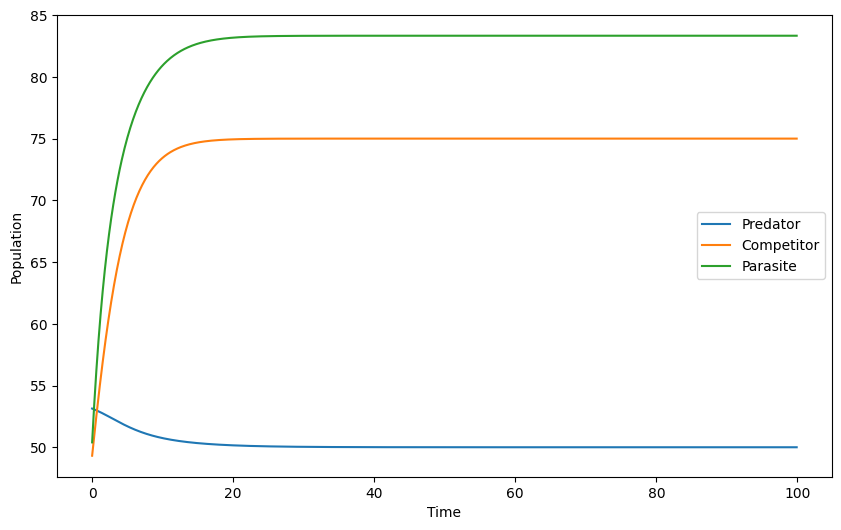

In [47]:
# 使用欧拉方法进行数值求解
time_points = np.arange(0, T, dt)

predator_results = []
competitor_results = []
parasite_results = []

# 迭代求解
for t in time_points:
    predator_dot = f(prey, alligator, t)
    competitor_dot = g(alligator, host, t)
    parasite_dot = h(host, prey, t)

    prey = prey + dt * predator_dot
    alligator = alligator + dt * competitor_dot
    host = host + dt * parasite_dot

    predator_results.append(np.sum(prey))
    competitor_results.append(np.sum(alligator))
    parasite_results.append(np.sum(host))

# 可视化结果
plt.figure(figsize=(10, 6))
plt.plot(time_points, predator_results, label='Predator')#绘制捕食者
plt.plot(time_points, competitor_results, label='Competitor')#绘制竞争者
plt.plot(time_points, parasite_results, label='Parasite')#绘制寄生者
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.show()